In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2013-01-01'
end = '2024-03-21'
stock = 'NFLX'

data = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
ma_100_days = data.Low.rolling(100).mean()

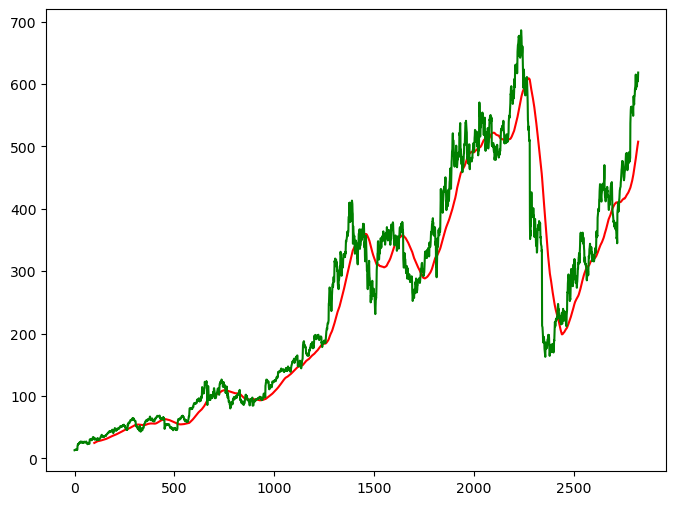

In [5]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Low, 'g')
plt.show()

In [6]:
ma_200_days = data.Low.rolling(200).mean()

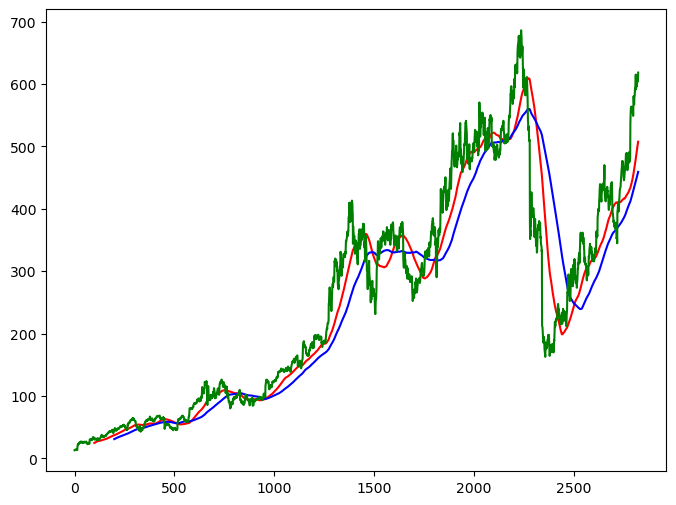

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Low, 'g')
plt.show()

In [8]:
ma_300_days = data.Low.rolling(300).mean()

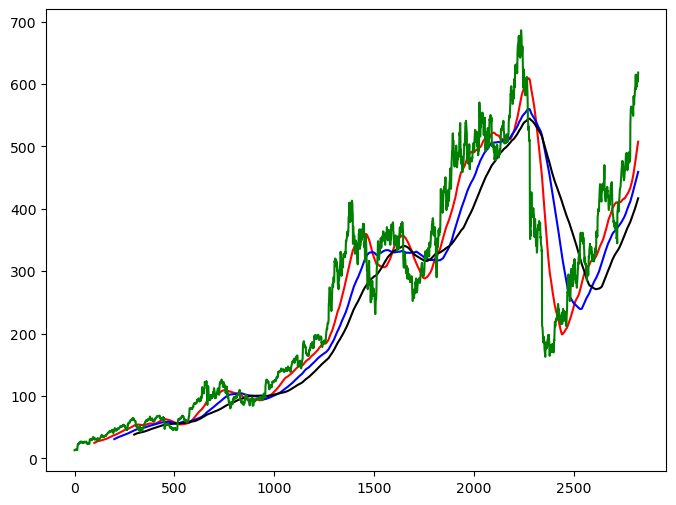

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(ma_300_days, 'k')
plt.plot(data.Low, 'g')
plt.show()

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = pd.DataFrame(data.Low[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Low[int(len(data)*0.80): len(data)])

In [12]:
data_train.shape[0] , data_test.shape[0]

(2258, 565)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
  x.append(data_train_scale[i-100:i])
  y.append(data_train_scale[i,0])

In [16]:
x,y = np.array(x), np.array(y)

In [17]:
import tensorflow as tf

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
model = Sequential()

model.add(LSTM(units= 50, activation = 'relu' , return_sequences = True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units= 60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units= 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units= 120, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units= 160, activation = 'relu'))
model.add(Dropout(0.6))

model.add(Dense(units=1))

In [20]:
model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [21]:
model.fit(x,y, epochs = 150, batch_size = 64, verbose = 1)

Epoch 1/150
34/34 [==============================] - 24s 590ms/step - loss: 0.0403
Epoch 2/150
34/34 [==============================] - 21s 615ms/step - loss: 0.0105
Epoch 3/150
34/34 [==============================] - 19s 570ms/step - loss: 0.0075
Epoch 4/150
34/34 [==============================] - 20s 593ms/step - loss: 0.0070
Epoch 5/150
34/34 [==============================] - 19s 569ms/step - loss: 0.0069
Epoch 6/150
34/34 [==============================] - 19s 567ms/step - loss: 0.0065
Epoch 7/150
34/34 [==============================] - 19s 568ms/step - loss: 0.0062
Epoch 8/150
34/34 [==============================] - 20s 579ms/step - loss: 0.0057
Epoch 9/150
34/34 [==============================] - 19s 568ms/step - loss: 0.0049
Epoch 10/150
34/34 [==============================] - 21s 615ms/step - loss: 0.0044
Epoch 11/150
34/34 [==============================] - 21s 621ms/step - loss: 0.0052
Epoch 12/150
34/34 [==============================] - 21s 626ms/step - loss: 0.0048
E

34/34 [==============================] - 21s 607ms/step - loss: 0.0023
Epoch 99/150
34/34 [==============================] - 21s 611ms/step - loss: 0.0024
Epoch 100/150
34/34 [==============================] - 20s 598ms/step - loss: 0.0025
Epoch 101/150
34/34 [==============================] - 20s 582ms/step - loss: 0.0024
Epoch 102/150
34/34 [==============================] - 20s 600ms/step - loss: 0.0022
Epoch 103/150
34/34 [==============================] - 21s 605ms/step - loss: 0.0025
Epoch 104/150
34/34 [==============================] - 21s 607ms/step - loss: 0.0022
Epoch 105/150
34/34 [==============================] - 21s 603ms/step - loss: 0.0024
Epoch 106/150
34/34 [==============================] - 21s 625ms/step - loss: 0.0024
Epoch 107/150
34/34 [==============================] - 21s 612ms/step - loss: 0.0023
Epoch 108/150
34/34 [==============================] - 21s 614ms/step - loss: 0.0023
Epoch 109/150
34/34 [==============================] - 21s 605ms/step - loss: 0.

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100, 120)          9

In [23]:
pas_100_days = data_train.tail(100)

In [24]:
data_test = pd.concat([pas_100_days, data_test], ignore_index = True )

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
  x.append(data_test_scale[i-100:i])
  y.append(data_test_scale[i,0])

In [27]:
x,y = np.array(x), np.array(y)

In [28]:
y_predict = model.predict(x)

18/18 [==============================] - 1s 57ms/step


In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict = y_predict*scale

In [31]:
y = y*scale

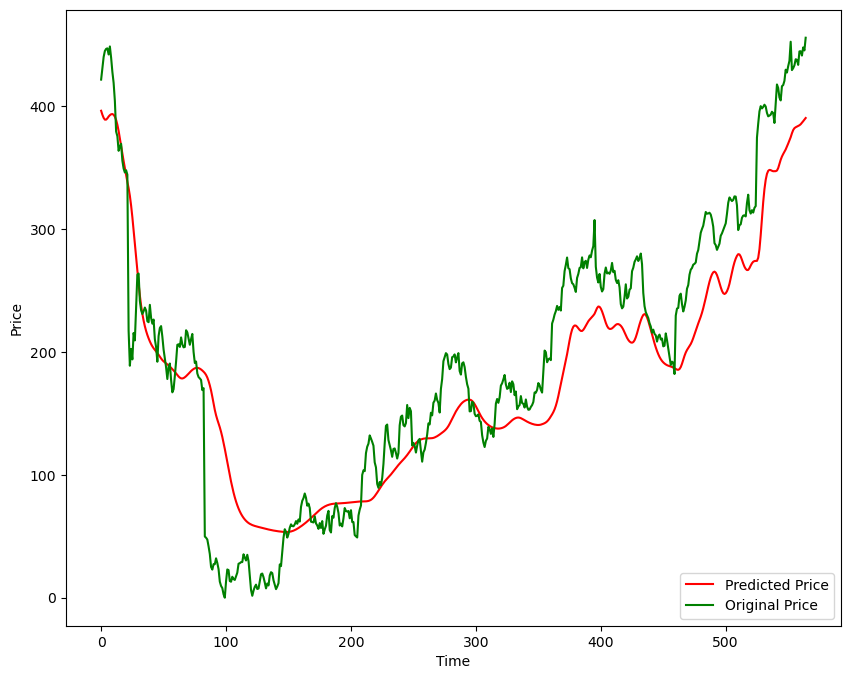

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' , label = 'Predicted Price')
plt.plot(y, 'g' , label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [33]:
model.save('The 4th Stock Predictions Model.keras')